9.398651869763153


Text(0.15, 0.8, 'y = ax + b = 0.432 + 9.399x')

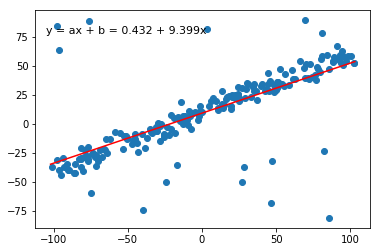

In [25]:
#least square using vertical line - a=(XT.X)^(−1)XT y where a =[a,b].T

import numpy as np

def matrix_lstsqr(x, y):
    # Computes the least-squares solution to a linear matrix equation.
    X = np.vstack([x, np.ones(len(x))]).T
    return (np.linalg.inv(X.T.dot(X)).dot(X.T)).dot(y)

with open('HW1_data\data1_new.pkl', 'rb') as f:
     data = pickle.load(f)
        
array = np.asarray(data)
#print(array)
x = array[:,0]
y = array[:,1]
slope, intercept = matrix_lstsqr(x, y)
print(intercept)
line_x = [round(min(x)) - 1, round(max(x)) + 1]
line_y = [slope*x_i + intercept for x_i in line_x]
#print(line_y)
plt.scatter(x,y)
plt.plot(line_x, line_y, color='red')
ftext = 'y = ax + b = {:.3f} + {:.3f}x'\
        .format(slope, intercept)
plt.figtext(.15,.8, ftext, fontsize=11, ha='left')

[4138.24045932  438.60191761]
438.60191760538453


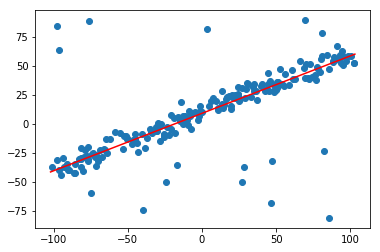

In [70]:
# orthogonal distance
cov_matrix = np.cov(array.T)
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
eig_min = min(eig_vals)
print(eig_vals)
print(eig_min)
def check(u):
    index =0
    if u[0]>= u[1]:
        index=1
    else:
        index=0
    return index
index = check(eig_vals)
a = eig_vecs[0,index]
b = eig_vecs[1,index]
mean_x = np.mean(x)
mean_y = np.mean(y)
d = a*mean_x + b*mean_y
#print(index)
line_x = [round(min(x)) - 1, round(max(x)) + 1]

line_y = [(d-a*x_i)/b for x_i in line_x]
plt.scatter(x,y)
plt.plot(line_x, line_y, color='red')



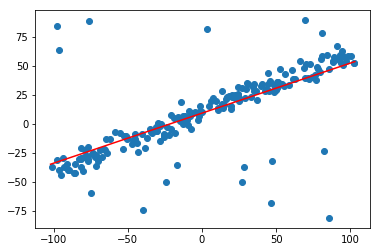

In [72]:
#Least Squares Fitting with Regularization
#solution a=(XT.X+ lamda*I)^(−1)XT y where a =[a,b].T where lamda = eigen values
def ls_reg(x, y):
    # Computes the least-squares solution to a linear matrix equation.
    X = np.vstack([x, np.ones(len(x))]).T
    eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
    lamda= np.diag(eig_vals)
    
    return (np.linalg.inv(X.T.dot(X)+lamda).dot(X.T)).dot(y)

slope, intercept = matrix_lstsqr(x, y)

line_x = [round(min(x)) - 1, round(max(x)) + 1]
line_y = [slope*x_i + intercept for x_i in line_x]
#print(line_y)
plt.scatter(x,y)
plt.plot(line_x, line_y, color='red')
